# Pandas Learnings Notebook

This notebook covers key concepts and operations in the Pandas library for data analysis in Python. We will explore DataFrame creation, indexing, concatenation, data cleaning, manipulation, and more.

## 1. DataFrame Creation

Pandas DataFrames can be created from various data structures, such as lists of dictionaries or dictionaries of lists. This provides flexibility when you're gathering data from different sources.

In [1]:
import pandas as pd
import numpy as np


In [ ]:

# --- Creation from a list of dictionaries ---
# Each dictionary in the list represents a row in the DataFrame.
list_of_dicts_data = [
    {'name': 'Alice', 'age': 30, 'city': 'New York', 'occupation': 'Engineer'},
    {'name': 'Bob', 'age': 24, 'city': 'Los Angeles', 'occupation': 'Artist'},
    {'name': 'Charlie', 'age': 35, 'city': 'Chicago', 'occupation': 'Teacher'},
    {'name': 'Diana', 'age': 28, 'city': 'New York', 'occupation': 'Engineer'}
]
df_from_list_of_dicts = pd.DataFrame(list_of_dicts_data)
print("DataFrame from list of dictionaries:")
# print(df_from_list_of_dicts)
# print("\n" + "-"*50 + "\n")
df_from_list_of_dicts

DataFrame from list of dictionaries:


,name,age,city,occupation
0,Alice,30,New York,Engineer
1,Bob,24,Los Angeles,Artist
2,Charlie,35,Chicago,Teacher
3,Diana,28,New York,Engineer


In [ ]:
# --- Creation from a dictionary of lists ---
# Each key-value pair in the dictionary represents a column and its data.
dict_of_lists_data = {
    'name': ['Alice', 'Bob', 'Charlie', 'Diana'],
    'age': [30, 24, 35, 28],
    'city': ["New York", "Los Angeles", "Chicago", "New York"],
    'Occupation': ['Engineer','Artist','Teacher','Engineer']
}
df_from_dict_of_lists = pd.DataFrame(dict_of_lists_data)
print("DataFrame from dictionary of lists:")
print(df_from_dict_of_lists)

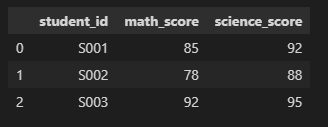

### ✏️ Try it Yourself! - Section 1

1.  Create a DataFrame named `student_grades` from the following list of dictionaries:
    
![Image](assets/pd_001.png)


2.  Similarly create a `student_grades` dataframe with the  dictionary of lists:
3.  Print both DataFrames.

## 2. Indexing with `loc` and `iloc`

`loc` is used for label-based indexing (uses row and column names).
`iloc` is used for integer position-based indexing (uses numerical indices, like Python list slicing).

`teach students when to use the . to get the columns and at what case it fails `

In [ ]:
# --- Using loc (label-based) ---
print("Using loc to select row with index 1:")
print(df_from_list_of_dicts.loc[1]) # Selects the second row (index label is 1)
print("\n")


In [ ]:
print("Using loc to select rows with index 0 and 2, and columns 'name' and 'city':")
print(df_from_list_of_dicts.loc[[0, 2], ['name', 'city']])
print("\n")

In [ ]:
print("Using loc to select all rows for the 'age' column:")
print(df_from_list_of_dicts.loc[:, 'age'])
print("\n" + "-"*50 + "\n")

In [ ]:

# --- Using iloc (integer position-based) ---
print("Using iloc to select the first row (position 0):")
print(df_from_list_of_dicts.iloc[0])

In [ ]:

print("Using iloc to select rows at position 0 and 2, and columns at position 0 (name) and 2 (city):")
print(df_from_list_of_dicts.iloc[[0, 2], [0, 2]])

In [ ]:
print("Using iloc to select the last two rows and the first two columns:")
print(df_from_list_of_dicts.iloc[-2:, :2])

### ✏️ Try it Yourself! - Section 2

Using `df_from_list_of_dicts`:
1.  Use `loc` to select the 'name' and 'occupation' for 'Bob' (row with index 1).
2.  Use `iloc` to select the data in the last row and the last two columns.
3.  Use `loc` to select all data for rows where the index is 0 or 3.
4.  Use `iloc` to select the first column ('name') for all rows.

## 3. Concatenation of DataFrames

The `pd.concat()` function allows you to combine multiple DataFrames either row-wise (stacking them vertically) or column-wise (joining them horizontally).

In [ ]:
df1_concat = pd.DataFrame({'A': ['A0', 'A1'], 'B': ['B0', 'B1'], 'key': ['K0', 'K1']})
df2_concat = pd.DataFrame({'A': ['A2', 'A3'], 'B': ['B2', 'B3'], 'key': ['K0', 'K2']})
df3_concat = pd.DataFrame({'C': ['C0', 'C1'], 'D': ['D0', 'D1']}, index=[0,1]) # Matching index for column concat


In [93]:
df1_concat

,A,B,key
0,A0,B0,K0
1,A1,B1,K1


In [94]:
df2_concat

,A,B,key
0,A2,B2,K0
1,A3,B3,K2


In [92]:
# Concatenating along rows (axis=0 is default)
# This stacks df2_concat below df1_concat.
# ignore_index=True creates a new continuous index for the resulting DataFrame.
concatenated_rows = pd.concat([df1_concat, df2_concat], ignore_index=True)
print("Concatenated along rows (ignore_index=True):")
concatenated_rows


Concatenated along rows (ignore_index=True):


,A,B,key
0,A0,B0,K0
1,A1,B1,K1
2,A2,B2,K0
3,A3,B3,K2


In [ ]:

# Concatenating along rows, preserving original indices
concatenated_rows_keep_index = pd.concat([df1_concat, df2_concat])
print("Concatenated along rows (keeping original indices):")
print(concatenated_rows_keep_index)
print("Accessing K0 from df1: ", concatenated_rows_keep_index.loc[0,'A'])
print("\n" + "-"*50 + "\n")

In [ ]:

# Concatenating along columns (axis=1)
# This places df3_concat next to df1_concat.
# For this to make sense, DataFrames should ideally have the same index or be aligned meaningfully.
concatenated_cols = pd.concat([df1_concat, df3_concat], axis=1)
print("Concatenated along columns (axis=1):")
print(concatenated_cols)

### ✏️ Try it Yourself! - Section 3

1.  Create two new DataFrames:
    ```python
    df_sales_q1 = pd.DataFrame({'product': ['WidgetA', 'WidgetB'], 'sales_q1': [100, 150]})
    df_sales_q2 = pd.DataFrame({'product': ['WidgetA', 'WidgetB'], 'sales_q2': [120, 130]})
    df_info = pd.DataFrame({'product': ['WidgetA', 'WidgetB'], 'manufacturer': ['ManuX', 'ManuY']})
    ```
2.  Concatenate `df_sales_q1` and `df_sales_q2` column-wise to create `df_sales_total`. (Hint: you might need to set an index first for a meaningful column bind, or merge them which is covered later. For concat, ensure indices align or think about how they would combine).

## 4. Deleting Rows and Columns

The `drop()` method is used to remove rows or columns. You need to specify whether you're dropping labels from the index (`axis=0`) or columns (`axis=1`).

In [85]:
data_del = {'col_w': [10, 20, 30, 40], 
            'col_x': [40, 50, 60, 70], 
            'col_y': [70, 80, 90, 100],
            'col_z': ['a', 'b', 'c', 'd']}
df_del = pd.DataFrame(data_del, index=['row1', 'row2', 'row3', 'row4'])
print("Original DataFrame for deletion:")
print(df_del)
print("\n" + "-"*50 + "\n")

Original DataFrame for deletion:
      col_w  col_x  col_y col_z
row1     10     40     70     a
row2     20     50     80     b
row3     30     60     90     c
row4     40     70    100     d

--------------------------------------------------



In [86]:

# Deleting a row (e.g., index 'row2')
# axis=0 indicates row deletion. inplace=False (default) returns a new DataFrame.
df_after_row_delete = df_del.drop('row2', axis=0)
print("DataFrame after deleting row 'row2':")
print(df_after_row_delete)
print("\n")

DataFrame after deleting row 'row2':
      col_w  col_x  col_y col_z
row1     10     40     70     a
row3     30     60     90     c
row4     40     70    100     d




In [87]:
# Deleting multiple rows
df_after_multi_row_delete = df_del.drop(['row1', 'row4'], axis=0)
print("DataFrame after deleting rows 'row1' and 'row4':")
print(df_after_multi_row_delete)
print("\n" + "-"*50 + "\n")

DataFrame after deleting rows 'row1' and 'row4':
      col_w  col_x  col_y col_z
row2     20     50     80     b
row3     30     60     90     c

--------------------------------------------------



In [88]:

# Deleting a column (e.g., 'col_x')
# axis=1 indicates column deletion.
df_after_col_delete = df_del.drop('col_x', axis=1)
print("DataFrame after deleting column 'col_x':")
print(df_after_col_delete)
print("\n")

DataFrame after deleting column 'col_x':
      col_w  col_y col_z
row1     10     70     a
row2     20     80     b
row3     30     90     c
row4     40    100     d




In [89]:

# Deleting multiple columns using the 'columns' keyword argument
df_after_multi_col_delete = df_del.drop(columns=['col_w', 'col_z'])
print("DataFrame after deleting columns 'col_w' and 'col_z':")
print(df_after_multi_col_delete)
print("\n")

DataFrame after deleting columns 'col_w' and 'col_z':
      col_x  col_y
row1     40     70
row2     50     80
row3     60     90
row4     70    100




In [90]:
# To modify the original DataFrame directly, use inplace=True
# Example: df_del.drop('row3', axis=0, inplace=True)
# print("Original DataFrame after inplace deletion of 'row3':")
# print(df_del) # This would show df_del modified

### ✏️ Try it Yourself! - Section 4

Using `df_del` (or a copy of it):
1.  Delete the column `col_y` and store the result in a new DataFrame called `df_del_noy`.
2.  From the original `df_del`, delete rows with index `row1` and `row3` simultaneously. Print the result.
3.  Try to delete a column named `col_nonexistent` from `df_del`. What happens? How can you prevent an error if the column might not exist? (Hint: look at the `errors` parameter in `drop()`).

## 5. Reading Files into Pandas

Pandas provides functions to easily read data from various file formats like CSV (Comma Separated Values), TSV (Tab Separated Values), and Excel spreadsheets.

**Note:** For these examples to run, you'll need to have corresponding `sample.csv`, `sample.tsv`, and `sample.xlsx` files in the data directory from the directory of this notebook, or provide the correct path to the files.

In [ ]:
# --- Reading CSV --- 
try:
    df_from_csv = pd.read_csv('data/sample.csv')
    print("DataFrame from CSV ('data/sample.csv'):")
    print(df_from_csv)
except FileNotFoundError:
    print("sample.csv not found. Please ensure the file exists in the correct location.")
print("\n" + "-"*50 + "\n")



In [ ]:
# --- Reading TSV (Tab Separated Values) ---
# For TSV files, you specify the delimiter as '\t'.
try:
    df_from_tsv = pd.read_csv('data/sample.tsv', sep='\t')
    print("DataFrame from TSV ('data/sample.tsv'):")
    print(df_from_tsv)
except FileNotFoundError:
    print("sample.tsv not found. Please ensure the file exists in the correct location.")
print("\n" + "-"*50 + "\n")


In [ ]:

# --- Reading Excel ---
try:
    # You can specify the sheet name or sheet index (0-based).
    df_from_excel = pd.read_excel('dataa/sample.xlsx', sheet_name='SheetAlpha', engine='openpyxl')
    print("DataFrame from Excel ('data/sample.xlsx', sheet 'SheetAlpha'):")
    print(df_from_excel)
    
    # Example: Reading another sheet if it existed
    # df_excel_sheet2 = pd.read_excel('sample.xlsx', sheet_name='SheetBeta') 
except FileNotFoundError:
    print("sample.xlsx not found. Please ensure the file exists or was created successfully.")
except ImportError:
    print("'openpyxl' library is not installed. Use pip or conda to install openpyxl.")
except Exception as e:
    # Catching other potential errors like sheet not found
    print(f"Error reading Excel file: {e}")

'openpyxl' library is not installed. Use pip or conda to install openpyxl.


### ✏️ Try it Yourself! - Section 5

1.  Create a new text file named `my_data.csv` with the following content:
    ```
    City,Country,Population
    Tokyo,Japan,37000000
    Delhi,India,30000000
    Shanghai,China,27000000
    ```
    Read this file into a Pandas DataFrame called `df_cities` and print it.
2.  Using the `sample.csv` file created in the example, read it into a DataFrame but only select the 'id' and 'score' columns. (Hint: use the `usecols` parameter of `pd.read_csv()`).
3.  If `sample.xlsx` was created, try reading it but skip the header row and assign your own column names: `['X_Value', 'Y_Value']`. (Hint: `skiprows` and `names` parameters in `pd.read_excel()`).

## 6. Basic Pandas DataFrame Methods

`head()`, `tail()`, `describe()`, and `info()` are essential for getting a quick overview of your DataFrame's structure and content.

In [6]:
# Download a CSV file and 

### ✏️ Try it Yourself! - Section 6

Using `df_basic_methods`:
1.  Display the first row of the DataFrame using `head()`.
2.  Display the last row of the DataFrame using `tail()`.
3.  Use `describe()` to get statistics for only the 'object' (string/categorical) columns. (Hint: `describe(include=['object'])`).
4.  What does `df_basic_methods.shape` output? What does it represent?
5.  What are the column names of `df_basic_methods`? (Hint: `df.columns`).

## 7. Data Cleaning and Manipulation

This section covers common data cleaning tasks:
* `isna()`: Detects missing values (NaN).
* `fillna()`: Fills missing values with a specified value or method.
* `replace()`: Replaces specified values with other values.
* `astype()`: Converts the data type of a column.
* `duplicated()` / `drop_duplicates()`: Identifies and removes duplicate rows.

In [7]:
data_clean_raw = {
    'id': [1, 2, 3, 4, 5, 2, 6, 7], # Note: duplicate id '2'
    'item_name': ['Apple', 'Banana', 'Orange', np.nan, 'Grape', 'Banana', 'Melon', 'Apple'],
    'quantity': [10, 15, np.nan, 20, 25, 15, 30, 10],
    'price_str': ['5.0', '3.0', '4.5', '7.0', '6.2', '3.0', '10.0', '5.0'],
    'category': ['Fruit', 'Fruit', 'Fruit', 'Vegetable', 'Fruit', 'Fruit', 'Fruit', 'Fruit']
}


In [ ]:
df_clean = pd.DataFrame(data_clean_raw)
df_clean= df_clean.set_index("id")
print("Original DataFrame for cleaning:")
print(df_clean)
print("\n" + "-"*50 + "\n")


Original DataFrame for cleaning:
   item_name  quantity price_str   category
id                                         
1      Apple      10.0       5.0      Fruit
2     Banana      15.0       3.0      Fruit
3     Orange       NaN       4.5      Fruit
4        NaN      20.0       7.0  Vegetable
5      Grape      25.0       6.2      Fruit
2     Banana      15.0       3.0      Fruit
6      Melon      30.0      10.0      Fruit
7      Apple      10.0       5.0      Fruit

--------------------------------------------------



In [ ]:

# --- isna() --- Detect missing values
print("Missing values (df_clean.isna()):")
print(df_clean.isna())
print("\nSum of missing values per column:")
print(df_clean.isna().sum())
print("\n" + "-"*50 + "\n")


In [15]:

# --- fillna() --- Fill missing values
df_filled = df_clean.copy() # Work on a copy
df_filled.fillna({"item_name": "Unknown"}, inplace=True)
df_filled.fillna({"quantity": df_filled["quantity"].median()}, inplace=True)
print("DataFrame after fillna():")
print(df_filled)
print("\n" + "-"*50 + "\n")


DataFrame after fillna():
   item_name  quantity price_str   category
id                                         
1      Apple      10.0       5.0      Fruit
2     Banana      15.0       3.0      Fruit
3     Orange      15.0       4.5      Fruit
4    Unknown      20.0       7.0  Vegetable
5      Grape      25.0       6.2      Fruit
2     Banana      15.0       3.0      Fruit
6      Melon      30.0      10.0      Fruit
7      Apple      10.0       5.0      Fruit

--------------------------------------------------



In [22]:

# --- replace() --- Replace values
df_replaced = df_filled.copy()
df_replaced.replace({"category": {"Vegetable":"Veggie"}}, inplace=True)
print("DataFrame after replace('Vegetable' with 'Veggie' in 'category'):")
print(df_replaced)
print("\n" + "-"*50 + "\n")


DataFrame after replace('Vegetable' with 'Veggie' in 'category'):
   item_name  quantity price_str category
id                                       
1      Apple      10.0       5.0    Fruit
2     Banana      15.0       3.0    Fruit
3     Orange      15.0       4.5    Fruit
4    Unknown      20.0       7.0   Veggie
5      Grape      25.0       6.2    Fruit
2     Banana      15.0       3.0    Fruit
6      Melon      30.0      10.0    Fruit
7      Apple      10.0       5.0    Fruit

--------------------------------------------------



In [23]:

# --- astype() --- Cast a pandas object to a specified dtype
df_typed = df_replaced.copy()
# Convert 'price_str' to float. Errors='coerce' will turn unparseable strings into NaN.
df_typed['price_numeric'] = pd.to_numeric(df_typed['price_str'], errors='coerce')
# df_typed['price_numeric'] = df_typed['price_str'].astype(float) # This would raise an error if there were non-numeric strings not handled by to_numeric
df_typed.drop('price_str', axis=1, inplace=True) # Drop the original string column
print("DataFrame after converting 'price_str' to numeric 'price_numeric':")
print(df_typed)
print("Data types after astype():")
print(df_typed.dtypes)
print("\n" + "-"*50 + "\n")



DataFrame after converting 'price_str' to numeric 'price_numeric':
   item_name  quantity category  price_numeric
id                                            
1      Apple      10.0    Fruit            5.0
2     Banana      15.0    Fruit            3.0
3     Orange      15.0    Fruit            4.5
4    Unknown      20.0   Veggie            7.0
5      Grape      25.0    Fruit            6.2
2     Banana      15.0    Fruit            3.0
6      Melon      30.0    Fruit           10.0
7      Apple      10.0    Fruit            5.0
Data types after astype():
item_name         object
quantity         float64
category          object
price_numeric    float64
dtype: object

--------------------------------------------------



In [24]:
# --- duplicated() / drop_duplicates() --- Find and remove duplicate rows
print("Identifying duplicated rows (all columns considered by default):")
print(df_typed.duplicated())
print("\nShow duplicated rows (keeping first occurrence as non-duplicate):")
print(df_typed[df_typed.duplicated()])
print("\nShow all occurrences of duplicated rows (based on all columns):")
print(df_typed[df_typed.duplicated(keep=False)])
print("\n")


Identifying duplicated rows (all columns considered by default):
id
1    False
2    False
3    False
4    False
5    False
2     True
6    False
7     True
dtype: bool

Show duplicated rows (keeping first occurrence as non-duplicate):
   item_name  quantity category  price_numeric
id                                            
2     Banana      15.0    Fruit            3.0
7      Apple      10.0    Fruit            5.0

Show all occurrences of duplicated rows (based on all columns):
   item_name  quantity category  price_numeric
id                                            
1      Apple      10.0    Fruit            5.0
2     Banana      15.0    Fruit            3.0
2     Banana      15.0    Fruit            3.0
7      Apple      10.0    Fruit            5.0




In [25]:

# Drop duplicates, keeping the first occurrence by default
df_no_duplicates = df_typed.drop_duplicates()
print("DataFrame after drop_duplicates() (keeping first):")
print(df_no_duplicates)
print("\n")


DataFrame after drop_duplicates() (keeping first):
   item_name  quantity category  price_numeric
id                                            
1      Apple      10.0    Fruit            5.0
2     Banana      15.0    Fruit            3.0
3     Orange      15.0    Fruit            4.5
4    Unknown      20.0   Veggie            7.0
5      Grape      25.0    Fruit            6.2
6      Melon      30.0    Fruit           10.0




In [26]:

# Drop duplicates based on a subset of columns
df_no_dup_subset = df_typed.drop_duplicates(subset=['item_name', 'category'], keep='last')
print("DataFrame after drop_duplicates based on 'item_name' and 'category' (keeping last):")
print(df_no_dup_subset)

DataFrame after drop_duplicates based on 'item_name' and 'category' (keeping last):
   item_name  quantity category  price_numeric
id                                            
3     Orange      15.0    Fruit            4.5
4    Unknown      20.0   Veggie            7.0
5      Grape      25.0    Fruit            6.2
2     Banana      15.0    Fruit            3.0
6      Melon      30.0    Fruit           10.0
7      Apple      10.0    Fruit            5.0


### ✏️ Try it Yourself! - Section 7

Using `df_clean` (or a copy):
1.  Fill the NaN values in the 'quantity' column with `0`.
2.  In the 'category' column, replace 'Fruit' with 'FRUIT_TYPE' and 'Vegetable' with 'VEGGIE_TYPE'.
3.  Convert the 'quantity' column (after filling NaNs) to the `str` (string) data type.
4.  Identify and print rows that are duplicates based *only* on the 'id' column. Then, drop these duplicates, keeping the `False` (last) occurrence.

## 8. `sort_values()`

The `sort_values()` method sorts a DataFrame by one or more columns. You can specify ascending or descending order.

In [95]:
data_sort = {'name': ['Eve', 'Bob', 'Charlie', 'Alice', 'David'], 
             'age': [29, 24, 35, 30, 22],
             'score': [88, 95, 85, 92, 95]}
df_sort = pd.DataFrame(data_sort)
print("Original DataFrame for sorting:")
df_sort


Original DataFrame for sorting:


,name,age,score
0,Eve,29,88
1,Bob,24,95
2,Charlie,35,85
3,Alice,30,92
4,David,22,95


In [96]:

# Sort by 'name' in ascending order (default)
df_sorted_name = df_sort.sort_values(by='name')
print("Sorted by name (ascending):")
df_sorted_name

Sorted by name (ascending):


,name,age,score
3,Alice,30,92
1,Bob,24,95
2,Charlie,35,85
4,David,22,95
0,Eve,29,88


In [97]:

# Sort by 'age' in descending order
df_sorted_age_desc = df_sort.sort_values(by='age', ascending=False)
print("Sorted by age (descending):")
df_sorted_age_desc


Sorted by age (descending):


,name,age,score
2,Charlie,35,85
3,Alice,30,92
0,Eve,29,88
1,Bob,24,95
4,David,22,95


In [98]:
# Sort by multiple columns: 'score' descending, then 'name' ascending
# This is useful when there are ties in the primary sort column ('score').
df_sorted_multiple = df_sort.sort_values(by=['score', 'name'], ascending=[False, True])
print("Sorted by score (desc) then name (asc):")
df_sorted_multiple

Sorted by score (desc) then name (asc):


,name,age,score
1,Bob,24,95
4,David,22,95
3,Alice,30,92
0,Eve,29,88
2,Charlie,35,85


### ✏️ Try it Yourself! - Section 8

Using `df_sort`:
1.  Sort the DataFrame by 'age' in ascending order, and then by 'score' in ascending order for ties in age.
2.  Sort the DataFrame by 'name' in descending order.
3.  Sort the DataFrame to find who has the lowest score. If there are ties, list them alphabetically by name.

## 9. Filtering and Boolean Masking

This technique allows you to select subsets of data from a DataFrame based on one or more conditions. A boolean mask is a Series of True/False values that is used to select rows where the mask is True.

In [ ]:
# Get the Dataset from the Internet Kaggle and Use some Filtering and Boolean masking to show some results 

### ✏️ Try it Yourself! - Section 9

1.  Make a Scenerio yourself and do the filtering through the boolean masks. 

## 10. `apply()` and `map()`

* `apply()`: Used to apply a function along an axis of the DataFrame (rows or columns) or element-wise on a Series.
* `map()`: Used on a Series to substitute each value in the Series with another value. It's useful for mapping categorical data to numerical representations or applying a simple element-wise transformation based on a dictionary or a function.

In [31]:
data_orders = {
    'Order_ID': [1001, 1002, 1003, 1004, 1005],
    'Customer_Name': ['Alice', 'Bob', 'Charlie', 'Diana', 'Ethan'],
    'Drink': ['Latte', 'Espresso', 'Cappuccino', 'Flat White', 'Americano'],
    'Size': ['Medium', 'Small', 'Large', 'Medium', 'Large'],
    'Price': [3.50, 2.00, 4.00, 3.75, 3.25],
    'Tip': [0.50, 0.00, 1.00, 0.25, 0.75],
    'Payment_Method': ['Card', 'Cash', 'Card', 'Card', 'Mobile'],
    'Order_Time': ['08:15', '09:00', '08:45', '10:30', '11:00']
}
df_apply_map = pd.DataFrame(data_orders)
print("Original DataFrame for apply/map:")
print(df_apply_map)


Original DataFrame for apply/map:
   Order_ID Customer_Name       Drink    Size  Price   Tip Payment_Method  \
0      1001         Alice       Latte  Medium   3.50  0.50           Card   
1      1002           Bob    Espresso   Small   2.00  0.00           Cash   
2      1003       Charlie  Cappuccino   Large   4.00  1.00           Card   
3      1004         Diana  Flat White  Medium   3.75  0.25           Card   
4      1005         Ethan   Americano   Large   3.25  0.75         Mobile   

  Order_Time  
0      08:15  
1      09:00  
2      08:45  
3      10:30  
4      11:00  


In [33]:

# --- apply() on a Series ---
# Example: Square each number in 'A_nums'
df_apply_map['Tip_Squared'] = df_apply_map['Tip'].apply(lambda x: x**2)
print("DataFrame with 'Tip Squared' (using apply on Series 'A_nums'):")
print(df_apply_map)
print("\n")


DataFrame with 'Tip Squared' (using apply on Series 'A_nums'):
   Order_ID Customer_Name       Drink    Size  Price   Tip Payment_Method  \
0      1001         Alice       Latte  Medium   3.50  0.50           Card   
1      1002           Bob    Espresso   Small   2.00  0.00           Cash   
2      1003       Charlie  Cappuccino   Large   4.00  1.00           Card   
3      1004         Diana  Flat White  Medium   3.75  0.25           Card   
4      1005         Ethan   Americano   Large   3.25  0.75         Mobile   

  Order_Time  Tip_Squared  
0      08:15       0.2500  
1      09:00       0.0000  
2      08:45       1.0000  
3      10:30       0.0625  
4      11:00       0.5625  




In [38]:

# Example: Get the length of each string in 'D_text'
df_apply_map['Customer_char_len'] = df_apply_map['Customer_Name'].apply(len)
print("DataFrame with 'Customer_char_len' (using apply on Series 'Customer_name'):")
print(df_apply_map[['Customer_Name', 'Customer_char_len']])
print("\n" + "-"*50 + "\n")


DataFrame with 'Customer_char_len' (using apply on Series 'Customer_name'):
  Customer_Name  Customer_char_len
0         Alice                  5
1           Bob                  3
2       Charlie                  7
3         Diana                  5
4         Ethan                  5

--------------------------------------------------



In [39]:
df_apply_map

,Order_ID,Customer_Name,Drink,Size,Price,Tip,Payment_Method,Order_Time,Tip_Squared,Custormer_chars_len,Customer_char_len
0,1001,Alice,Latte,Medium,3.50,0.50,Card,08:15,0.2500,5,5
1,1002,Bob,Espresso,Small,2.00,0.00,Cash,09:00,0.0000,3,3
2,1003,Charlie,Cappuccino,Large,4.00,1.00,Card,08:45,1.0000,7,7
3,1004,Diana,Flat White,Medium,3.75,0.25,Card,10:30,0.0625,5,5
4,1005,Ethan,Americano,Large,3.25,0.75,Mobile,11:00,0.5625,5,5


In [41]:
# --- apply() on a DataFrame ---
# Example: Calculate the sum of 'A_nums' and 'B_nums' for each row (axis=1)
df_apply_map['Total Price'] = df_apply_map[['Price', 'Tip']].apply(np.sum, axis=1)
print("Sum of each row for columns Price and Tip (using apply on DataFrame axis=1):")
print(df_apply_map[['Price', 'Tip', 'Total Price']])
print("\n")


Sum of each row for columns Price and Tip (using apply on DataFrame axis=1):
   Price   Tip  Total Price
0   3.50  0.50          4.0
1   2.00  0.00          2.0
2   4.00  1.00          5.0
3   3.75  0.25          4.0
4   3.25  0.75          4.0




In [42]:

# Example: Calculate the mean of each numerical column (axis=0)
column_means = df_apply_map[['Price', 'Tip', 'Tip_Squared']].apply(np.mean, axis=0)
print("Mean of specified columns (using apply on DataFrame axis=0):")
print(column_means)
print("\n" + "-"*50 + "\n")



Mean of specified columns (using apply on DataFrame axis=0):
Price          3.300
Tip            0.500
Tip_Squared    0.375
dtype: float64

--------------------------------------------------



In [43]:
df_apply_map

,Order_ID,Customer_Name,Drink,Size,Price,Tip,Payment_Method,Order_Time,Tip_Squared,Custormer_chars_len,Customer_char_len,Row_Sum,Total Price
0,1001,Alice,Latte,Medium,3.50,0.50,Card,08:15,0.2500,5,5,4.0,4.0
1,1002,Bob,Espresso,Small,2.00,0.00,Cash,09:00,0.0000,3,3,2.0,2.0
2,1003,Charlie,Cappuccino,Large,4.00,1.00,Card,08:45,1.0000,7,7,5.0,5.0
3,1004,Diana,Flat White,Medium,3.75,0.25,Card,10:30,0.0625,5,5,4.0,4.0
4,1005,Ethan,Americano,Large,3.25,0.75,Mobile,11:00,0.5625,5,5,4.0,4.0


In [44]:
# --- map() on a Series ---
# Example: Map 'C_category' strings to numerical values
category_mapping = {'Small': 1, 'Medium': 2, 'Large': 3}
df_apply_map['Size_Numerical'] = df_apply_map['Size'].map(category_mapping)
print("DataFrame with 'Size_Numerical' (using map on Series 'Size'):")
print(df_apply_map[['Size', 'Size_Numerical']])
print("\n")



DataFrame with 'Size_Numerical' (using map on Series 'Size'):
     Size  Size_Numerical
0  Medium               2
1   Small               1
2   Large               3
3  Medium               2
4   Large               3




In [46]:
# Example: Using map with a function (less common than apply for this, but possible)
df_apply_map['New Tip'] = df_apply_map['Tip'].map(lambda x: x + 3.47)
print("DataFrame with 'New Tip' (using map with a lambda function):")
print(df_apply_map[['Tip', 'New Tip']])

DataFrame with 'New Tip' (using map with a lambda function):
    Tip  New Tip
0  0.50     3.97
1  0.00     3.47
2  1.00     4.47
3  0.25     3.72
4  0.75     4.22


In [48]:
df_apply_map

,Order_ID,Customer_Name,Drink,Size,Price,Tip,Payment_Method,Order_Time,Tip_Squared,Custormer_chars_len,Customer_char_len,Row_Sum,Total Price,Size_Numerical,New Tip
0,1001,Alice,Latte,Medium,3.50,0.50,Card,08:15,0.2500,5,5,4.0,4.0,2,3.97
1,1002,Bob,Espresso,Small,2.00,0.00,Cash,09:00,0.0000,3,3,2.0,2.0,1,3.47
2,1003,Charlie,Cappuccino,Large,4.00,1.00,Card,08:45,1.0000,7,7,5.0,5.0,3,4.47
3,1004,Diana,Flat White,Medium,3.75,0.25,Card,10:30,0.0625,5,5,4.0,4.0,2,3.72
4,1005,Ethan,Americano,Large,3.25,0.75,Mobile,11:00,0.5625,5,5,4.0,4.0,3,4.22


### ✏️ Try it Yourself! - Section 10

Using `df_apply_map`:
1.  Using the map funciton convert all the Drinks into Lower Case .
2.  Try to undertand the axis = 0 and axis = 1 operation using the apply. 

## 11. `groupby()` and Joins

* `groupby()`: Involves splitting the data into groups based on some criteria, applying a function (aggregation, transformation, filtration) to each group independently, and then combining the results into a data structure.
* Joins (e.g., `pd.merge()`): Combine DataFrames based on common columns or indices, similar to SQL joins.

In [56]:
# --- groupby() ---
data_groupby = {
    'Department': [
        'HR', 'Tech', 'HR', 'Tech', 'Marketing', 'Tech', 'Marketing',
        'Sales', 'HR', 'Tech', 'Sales', 'Marketing', 'HR', 'Tech', 'Sales'
    ],
    'Employee': [
        'Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace',
        'Hannah', 'Ian', 'Jack', 'Karen', 'Laura', 'Mike', 'Nina', 'Oscar'
    ],
    'Salary': [
        70000, 80000, 65000, 95000, 75000, 82000, 72000,
        68000, 62000, 87000, 66000, 73000, 64000, 90000, 69000
    ],
    'Projects': [
        3, 5, 2, 6, 4, 4, 3,
        2, 1, 5, 3, 4, 2, 5, 2
    ]
}

df_groupby_ops = pd.DataFrame(data_groupby)
print("Original DataFrame for groupby operations:")
df_groupby_ops


Original DataFrame for groupby operations:


,Department,Employee,Salary,Projects
0,HR,Alice,70000,3
1,Tech,Bob,80000,5
2,HR,Charlie,65000,2
3,Tech,David,95000,6
4,Marketing,Eve,75000,4
5,Tech,Frank,82000,4
6,Marketing,Grace,72000,3
7,Sales,Hannah,68000,2
8,HR,Ian,62000,1
9,Tech,Jack,87000,5


In [57]:

# Group by 'Department' and calculate the mean salary for each
mean_salary_by_dept = df_groupby_ops.groupby('Department')['Salary'].mean()
print("Mean salary per department:")
print(mean_salary_by_dept)
print("\n")


Mean salary per department:
Department
HR           65250.000000
Marketing    73333.333333
Sales        67666.666667
Tech         86800.000000
Name: Salary, dtype: float64




In [58]:

# Group by 'Department' and calculate multiple aggregations
agg_stats_by_dept = df_groupby_ops.groupby('Department').agg(
    mean_salary=('Salary', 'mean'),
    total_projects=('Projects', 'sum'),
    num_employees=('Employee', 'count')
).reset_index() # reset_index() converts the grouped output back to a DataFrame
print("Aggregated stats per department (mean salary, total projects, num_employees):")
print(agg_stats_by_dept)
print("\n" + "-"*50 + "\n")



Aggregated stats per department (mean salary, total projects, num_employees):
  Department   mean_salary  total_projects  num_employees
0         HR  65250.000000               8              4
1  Marketing  73333.333333              11              3
2      Sales  67666.666667               7              3
3       Tech  86800.000000              25              5

--------------------------------------------------



In [50]:
# --- Joins (using pd.merge()) ---
df_employees = pd.DataFrame({
    'emp_id': ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8'],
    'name': ['Alice', 'Bob', 'Charlie', 'Diana', 'Edward', 'Fiona', 'George', 'Hannah'],
    'dept_id': ['D1', 'D2', 'D1', 'D3', 'D2', 'D4', 'D5', 'D6']
})

df_departments = pd.DataFrame({
    'dept_id': ['D1', 'D2', 'D3', 'D4', 'D7'],
    'dept_name': ['HR', 'Technology', 'Marketing', 'Finance', 'Legal']
})

print("Employees DataFrame:")
print(df_employees)
print("\nDepartments DataFrame:")
print(df_departments)
print("\n" + "-"*50 + "\n")


Employees DataFrame:
  emp_id     name dept_id
0     E1    Alice      D1
1     E2      Bob      D2
2     E3  Charlie      D1
3     E4    Diana      D3
4     E5   Edward      D2
5     E6    Fiona      D4
6     E7   George      D5
7     E8   Hannah      D6

Departments DataFrame:
  dept_id   dept_name
0      D1          HR
1      D2  Technology
2      D3   Marketing
3      D4     Finance
4      D7       Legal

--------------------------------------------------



<img src="assets/joins in sql.png" alt="Joins in SQL" width="500"/>

In [51]:

# Inner join: Keeps only matching keys from both DataFrames
inner_join_df = pd.merge(df_employees, df_departments, on='dept_id', how='inner')
print("Inner join on 'dept_id':")
print(inner_join_df)
print("\n")


Inner join on 'dept_id':
  emp_id     name dept_id   dept_name
0     E1    Alice      D1          HR
1     E2      Bob      D2  Technology
2     E3  Charlie      D1          HR
3     E4    Diana      D3   Marketing
4     E5   Edward      D2  Technology
5     E6    Fiona      D4     Finance




In [52]:

# Left join: Keeps all keys from the left DataFrame (df_employees) and matching from right
left_join_df = pd.merge(df_employees, df_departments, on='dept_id', how='left')
print("Left join on 'dept_id':")
print(left_join_df)
print("\n")


Left join on 'dept_id':
  emp_id     name dept_id   dept_name
0     E1    Alice      D1          HR
1     E2      Bob      D2  Technology
2     E3  Charlie      D1          HR
3     E4    Diana      D3   Marketing
4     E5   Edward      D2  Technology
5     E6    Fiona      D4     Finance
6     E7   George      D5         NaN
7     E8   Hannah      D6         NaN




In [53]:

# Right join: Keeps all keys from the right DataFrame (df_departments) and matching from left
right_join_df = pd.merge(df_employees, df_departments, on='dept_id', how='right')
print("Right join on 'dept_id':")
print(right_join_df)
print("\n")



Right join on 'dept_id':
  emp_id     name dept_id   dept_name
0     E1    Alice      D1          HR
1     E3  Charlie      D1          HR
2     E2      Bob      D2  Technology
3     E5   Edward      D2  Technology
4     E4    Diana      D3   Marketing
5     E6    Fiona      D4     Finance
6    NaN      NaN      D7       Legal




In [54]:
# Outer join: Keeps all keys from both DataFrames
outer_join_df = pd.merge(df_employees, df_departments, on='dept_id', how='outer')
print("Outer join on 'dept_id':")
print(outer_join_df)

Outer join on 'dept_id':
  emp_id     name dept_id   dept_name
0     E1    Alice      D1          HR
1     E3  Charlie      D1          HR
2     E2      Bob      D2  Technology
3     E5   Edward      D2  Technology
4     E4    Diana      D3   Marketing
5     E6    Fiona      D4     Finance
6     E7   George      D5         NaN
7     E8   Hannah      D6         NaN
8    NaN      NaN      D7       Legal


### ✏️ Try it Yourself! - Section 11

Using `df_groupby_ops`:
1.  Group by 'Department' and find the maximum 'Salary' and the minimum 'Projects' for each department.
2.  For each 'Department', list all employee names. (Hint: `agg` with a lambda function or a specific string function like `'list'` or `'unique'`).

For Joins:
1.  Create two new DataFrames:
    ```python
    df_orders = pd.DataFrame({'order_id': ['O101', 'O102', 'O103', 'O104'], 'customer_id': ['C1', 'C2', 'C1', 'C3'], 'amount': [100, 150, 50, 200]})
    df_customers = pd.DataFrame({'customer_id': ['C1', 'C2', 'C4'], 'customer_name': ['John Doe', 'Jane Smith', 'Peter Pan']})
    ```
2.  Perform an inner join between `df_orders` and `df_customers` on `customer_id`.
3.  Perform a left join where `df_orders` is the left table.
4.  Perform an outer join. What does this tell you about customers who haven't placed orders or orders with unknown customers?

## 12. Working with Datetime

Pandas has excellent built-in capabilities for handling time series data. The `pd.to_datetime()` function converts argument to datetime, and the `.dt` accessor provides access to datetime properties (like year, month, day, weekday).

In [60]:
date_strings = [
    '2024-01-15',              # ISO format
    'February 10, 2024 10:30', # Natural language format
    '03/05/2024',              # MM/DD/YYYY (U.S.)
    '20.04.2024',              # DD.MM.YYYY (European)
    '2024/04/25',              # YYYY/MM/DD
    '15-03-24',                # DD-MM-YY
    'April 1st, 2024',         # Informal written format
    '2024-05-12T08:00:00Z',    # ISO 8601 with time and UTC
    '',                        # Empty value
    'Not a date'              # Invalid string
]

# Random event values
df_datetime = pd.DataFrame({
    'raw_date_str': date_strings,
    'event_value': np.random.randint(10, 100, size=len(date_strings))
})
# Convert 'raw_date_str' to datetime objects
# errors='coerce' will turn unparseable date strings into NaT (Not a Time)
df_datetime['parsed_date'] = pd.to_datetime(df_datetime['raw_date_str'], errors='coerce')
print("DataFrame with parsed datetime column:")
df_datetime


DataFrame with parsed datetime column:


,raw_date_str,event_value,parsed_date
0,2024-01-15,42,2024-01-15
1,"February 10, 2024 10:30",97,NaT
2,03/05/2024,58,NaT
3,20.04.2024,31,NaT
4,2024/04/25,57,NaT
5,15-03-24,51,NaT
6,"April 1st, 2024",23,NaT
7,2024-05-12T08:00:00Z,80,NaT
8,,40,NaT
9,Not a date,71,NaT


In [61]:
from dateutil import parser

def try_parse_date(date_str):
    try:
        return parser.parse(date_str, dayfirst=True)
    except:
        return pd.NaT

In [66]:
# Apply custom parser
df_datetime['parsed_date'] = df_datetime['raw_date_str'].apply(try_parse_date)
df_datetime['parsed_date'] = pd.to_datetime(df_datetime['parsed_date'], errors='coerce')


In [67]:
df_datetime

,raw_date_str,event_value,parsed_date
0,2024-01-15,42,2024-01-15 00:00:00
1,"February 10, 2024 10:30",97,2024-02-10 10:30:00
2,03/05/2024,58,2024-05-03 00:00:00
3,20.04.2024,31,2024-04-20 00:00:00
4,2024/04/25,57,2024-04-25 00:00:00
5,15-03-24,51,2024-03-15 00:00:00
6,"April 1st, 2024",23,2024-04-01 00:00:00
7,2024-05-12T08:00:00Z,80,NaT
8,,40,NaT
9,Not a date,71,NaT


In [68]:
# Drop NaT rows for datetime operations
df_dt_components = df_datetime.dropna(subset=['parsed_date']).copy()

# Check it's not empty
if not df_dt_components.empty:
    df_dt_components['year'] = df_dt_components['parsed_date'].dt.year
    df_dt_components['month'] = df_dt_components['parsed_date'].dt.month
    df_dt_components['day'] = df_dt_components['parsed_date'].dt.day
    df_dt_components['hour'] = df_dt_components['parsed_date'].dt.hour
    df_dt_components['weekday_name'] = df_dt_components['parsed_date'].dt.day_name()
    df_dt_components['day_of_year'] = df_dt_components['parsed_date'].dt.dayofyear
    
    # Handle week_of_year safely
    df_dt_components['week_of_year'] = df_dt_components['parsed_date'].dt.isocalendar().week.values

    # Show results
    print("DataFrame with extracted datetime components:")
    print(df_dt_components[['raw_date_str', 'parsed_date', 'year', 'month', 'day', 'hour', 'weekday_name', 'day_of_year', 'week_of_year']])
else:
    print("DataFrame is empty after dropping NaT values from 'parsed_date'. Cannot extract components.")

DataFrame with extracted datetime components:
              raw_date_str         parsed_date  year  month  day  hour  \
0               2024-01-15 2024-01-15 00:00:00  2024      1   15     0   
1  February 10, 2024 10:30 2024-02-10 10:30:00  2024      2   10    10   
2               03/05/2024 2024-05-03 00:00:00  2024      5    3     0   
3               20.04.2024 2024-04-20 00:00:00  2024      4   20     0   
4               2024/04/25 2024-04-25 00:00:00  2024      4   25     0   
5                 15-03-24 2024-03-15 00:00:00  2024      3   15     0   
6          April 1st, 2024 2024-04-01 00:00:00  2024      4    1     0   

  weekday_name  day_of_year  week_of_year  
0       Monday           15             3  
1     Saturday           41             6  
2       Friday          124            18  
3     Saturday          111            16  
4     Thursday          116            17  
5       Friday           75            11  
6       Monday           92            14  


### ✏️ Try it Yourself! - Section 12

Using `df_dt_components` (assuming it's not empty after dropping NaT):
1.  Create a new column 'is_weekend' which is `True` if the `weekday_name` is Saturday or Sunday, and `False` otherwise.
2.  Create a new column 'date_plus_7_days' by adding 7 days to each date in `parsed_date`. (Hint: `pd.Timedelta`).
3.  Convert the 'parsed_date' column to strings formatted as 'YYYY/MM/DD'. (Hint: `.dt.strftime('%Y/%m/%d')`).

## 13. Pivoting and Crosstab

* `pivot_table()`: Creates a spreadsheet-style pivot table as a DataFrame. It's a powerful tool for reshaping and summarizing data.
* `crosstab()`: Computes a simple cross-tabulation of two (or more) factors. By default, it computes a frequency table of the factors unless an array of values and an aggregation function are passed.

In [81]:
data_pivot_raw = {'Date': pd.to_datetime(['2024-01-01', '2024-01-01', '2024-01-02', '2024-01-02', '2024-01-01', '2024-01-02', '2024-01-03']),
                  'Region': ['North', 'South', 'North', 'South', 'North', 'South', 'North'],
                  'Product': ['Laptop', 'iPhone', 'Macbook', 'Tablet', 'iPads', 'Headset', 'Airpods'],
                  'Sales': [100, 150, 200, 120, 180, 220, 90],
                  'Quantity': [10, 12, 15, 8, 14, 16, 7]}
df_pivot_data = pd.DataFrame(data_pivot_raw)
print("Original DataFrame for pivot/crosstab:")
df_pivot_data


Original DataFrame for pivot/crosstab:


,Date,Region,Product,Sales,Quantity
0,2024-01-01,North,Laptop,100,10
1,2024-01-01,South,iPhone,150,12
2,2024-01-02,North,Macbook,200,15
3,2024-01-02,South,Tablet,120,8
4,2024-01-01,North,iPads,180,14
5,2024-01-02,South,Headset,220,16
6,2024-01-03,North,Airpods,90,7


In [80]:
# Learn it Yourself and lets have discussion at the next day 

In [76]:

# --- pivot_table() ---
# Example 1: Total 'Sales' for each 'Product' (rows) across different 'Region' (columns).
pivot_sales_by_product_region = pd.pivot_table(df_pivot_data, 
                                               values='Sales',      # Values to aggregate
                                               index='Product',     # Rows of the pivot table
                                               columns='Region',    # Columns of the pivot table
                                               aggfunc="sum",      # Aggregation function (default is mean)
                                               fill_value=0)      # Value to replace missing combinations
print("Pivot table: Total Sales by Product and Region")
pivot_sales_by_product_region

Pivot table: Total Sales by Product and Region


Region,North,South
Product,,
Airpods,90,0
Headset,0,220
Laptop,100,0
Macbook,200,0
Tablet,0,120
iPads,180,0
iPhone,0,150


In [79]:

# Example 2: Average 'Sales' and 'Quantity' by 'Date' (rows) and 'Product' (columns)
pivot_avg_sales_qty = pd.pivot_table(df_pivot_data,
                                     values=['Sales', 'Quantity'],
                                     index='Date',
                                     columns='Product',
                                     aggfunc={'Sales': "mean", 'Quantity': "sum"},
                                     fill_value=0)
print("Pivot table: Avg Sales & Sum Quantity by Date and Product")
pivot_avg_sales_qty


Pivot table: Avg Sales & Sum Quantity by Date and Product


Quantity                                              Sales  \
Product     Airpods Headset Laptop Macbook Tablet iPads iPhone Airpods   
Date                                                                     
2024-01-01        0       0     10       0      0    14     12     0.0   
2024-01-02        0      16      0      15      8     0      0     0.0   
2024-01-03        7       0      0       0      0     0      0    90.0   

                                                        
Product    Headset Laptop Macbook Tablet  iPads iPhone  
Date                                                    
2024-01-01     0.0  100.0     0.0    0.0  180.0  150.0  
2024-01-02   220.0    0.0   200.0  120.0    0.0    0.0  
2024-01-03     0.0    0.0     0.0    0.0    0.0    0.0

In [82]:

# --- crosstab() ---
# Example 1: Frequency of 'Product' occurrences within each 'Region'.
crosstab_product_region_freq = pd.crosstab(index=df_pivot_data['Region'], 
                                           columns=df_pivot_data['Product'])
print("Crosstab: Frequency of Product by Region")
crosstab_product_region_freq

Crosstab: Frequency of Product by Region


Product,Airpods,Headset,Laptop,Macbook,Tablet,iPads,iPhone
Region,,,,,,,
North,1,0,1,1,0,1,0
South,0,1,0,0,1,0,1


In [83]:

# Example 2: Sum of 'Sales' for 'Product' vs 'Region'.
crosstab_sales_by_product_region = pd.crosstab(index=df_pivot_data['Region'], 
                                               columns=df_pivot_data['Product'], 
                                               values=df_pivot_data['Sales'], 
                                               aggfunc='sum')
print("Crosstab: Sum of Sales by Product and Region")
crosstab_sales_by_product_region


Crosstab: Sum of Sales by Product and Region


Product,Airpods,Headset,Laptop,Macbook,Tablet,iPads,iPhone
Region,,,,,,,
North,90.0,NaN,100.0,200.0,NaN,180.0,NaN
South,NaN,220.0,NaN,NaN,120.0,NaN,150.0


In [ ]:

# Example 3: Crosstab with normalized values (proportions)
crosstab_product_region_norm = pd.crosstab(index=df_pivot_data['Region'], 
                                           columns=df_pivot_data['Product'],
                                           normalize=True) # normalize='index', 'columns', or 'all' (True is 'all')
print("Crosstab: Normalized Frequency (Proportions) of Product by Region")
print(crosstab_product_region_norm)

# SO what is the difference between the pivot table and the cross tab 
Go through the following link to get a good idea. 

https://stackoverflow.com/questions/36267745/how-is-a-pandas-crosstab-different-from-a-pandas-pivot-table

### ✏️ Try it Yourself! - Section 13

Using `df_pivot_data`:
1.  Create a pivot table showing the average 'Quantity' for each 'Product' (as index) and 'Region' (as columns). Fill missing values with 0.
2.  Create a pivot table that shows the maximum 'Sales' for each 'Date' (as index), with 'Product' as columns and 'Region' as a secondary index level (multi-index rows).
3.  Create a crosstab showing the count (frequency) of 'Product' for each 'Date'.
4.  Create a crosstab showing the average 'Sales' for each combination of 'Region' (index) and 'Product' (columns). Add margins (subtotals) to this crosstab. (Hint: `margins=True` in `pd.crosstab()`).

## 14. Exporting Data

Pandas DataFrames can be easily exported to various file formats, with CSV and Excel being very common.

**Note:** `index=False` is often used to prevent writing the DataFrame's index as a column in the output file, unless the index contains meaningful data you wish to preserve.

In [84]:
# Create a data read from it, do some manipulation and store the data into the form of the csv. 

### ✏️ Try it Yourself! - Section 14

Using `df_to_export` (or any other DataFrame you've created, like `df_pivot_data`):
1.  Export `df_to_export` to a Tab Separated Values (TSV) file named `exported_data.tsv`. Remember to specify the separator.
2.  Export `df_pivot_data` to an Excel file named `pivot_export.xlsx`, but this time, include the index in the output file.
3.  Export only the 'item_name' and 'category' columns from `df_to_export` to a new CSV file named `partial_export.csv`.

## End of Pandas Learnings Notebook

This notebook has provided an overview and practical examples for many fundamental Pandas operations. Consistent practice with diverse datasets is key to mastering these techniques for effective data analysis and manipulation.